<a href="https://colab.research.google.com/github/abhinildutt/KNN-Naive-Bayes-LR-for-MNIST/blob/main/Copy_of_CS441_HW1_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CS441: Applied ML - HW 1

### Part I: MNIST Classification

Include all the code for Part 1 in this section

In [2]:
# initialization code
import numpy as np
from keras.datasets import mnist
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression

# loads MNIST data and reformat to 768-d vectors with values in range 0 to 1
# splits into train/val/test sets and provides indices for subsets of train
def load_mnist():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  x_train = np.reshape(x_train, (len(x_train), 28*28))
  x_test = np.reshape(x_test, (len(x_test), 28*28))
  maxval = x_train.max()
  x_train = x_train/maxval
  x_test = x_test/maxval
  x_val = x_train[:10000]
  y_val = y_train[:10000]
  x_train = x_train[10000:]
  y_train = y_train[10000:]
  train_indices = dict()
  train_indices['xs'] = np.arange(50)
  train_indices['s'] = np.arange(500)
  train_indices['m'] = np.arange(5000)
  train_indices['all'] = np.arange(50000)
  return (x_train, y_train), (x_val, y_val), (x_test, y_test), train_indices

# displays a set of mnist images
def display_mnist(x, subplot_rows=1, subplot_cols=1):
  if subplot_rows>1 or subplot_cols>1:
    fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(15,15))
    for i in np.arange(len(x)):
      ax[i].imshow(np.reshape(x[i], (28,28)), cmap='gray')
      ax[i].axis('off')
  else:
      plt.imshow(np.reshape(x, (28,28)), cmap='gray')
      plt.axis('off')
  plt.show()

# counts the number of examples per class
def class_count_mnist(y):
  count = np.zeros((10,),dtype='uint32')
  for i in np.arange(10):
    count[i] = sum(y==i)
  return count

11490434/11490434 [==============================] - 1s 0us/step


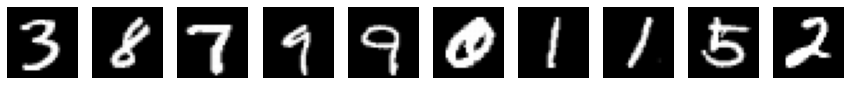

Total size: train=50000, val=10000, test =10000
Train subset size: xs=50, s=500, m=5000, all=50000
Class count for s: [56 57 51 49 46 46 50 51 40 54]


In [3]:
# example of using MNIST load, display, indices, and count functions
(x_train, y_train), (x_val, y_val), (x_test, y_test), train_indices = load_mnist()
display_mnist(x_train[:10],1,10)
print('Total size: train={}, val={}, test ={}'.format(len(x_train), len(x_val), len(x_test)))
print('Train subset size: xs={}, s={}, m={}, all={}'.format(len(train_indices['xs']),len(train_indices['s']),len(train_indices['m']),len(train_indices['all'])))
print('Class count for s: {}'.format(class_count_mnist(y_train[train_indices['s']])))

In [ ]:
!pip install ipython-autotime

%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.7 MB/s eta 0:00:00
time: 8.13 ms (started: 2023-02-12 01:22:38 +00:00)


In [ ]:
# This is a suggested function definition for KNN, but feel free to change it
def classify_KNN(X_trn, y_trn, X_tst, K=1):
  '''
  Classify each data point in X_tst using a K-nearest neighbor classifier based on (X_trn, y_trn), with L2 distance.   
  Input: X_trn[i] is the ith training data. y_trn[i] is the ith training label. 
         X_tst[i] is the ith example to classify.  K is the number of closest neighbors to use.
  Output: return y_pred, where y_pred[i] is the predicted ith test label 
  '''
  pre = []
  lab = []
  # needs code here
  for i in range(len(X_trn)):
    pre.append(np.matmul(np.transpose(X_trn[i]), X_trn[i]))
  for j in range(len(X_tst)):
    precom = np.zeros(len(X_trn))
    near = []
    for i in range(len(X_trn)):
      precom[i] = (pre[i] - 2 * np.matmul(X_trn[i], X_tst[j]))
      near.append((i, precom[i]))
    di = {}
    near.sort(key=lambda tup: tup[1])
    ma = 0
    label = 0
    for (ind, val) in near[:K] :
      if(ind in di.keys()):
        di[ind] += 1
      else :
        di[ind] = 1
      if(di[ind] > ma) :
        label = ind
        ma = di[ind]
    lab.append(y_trn[label])
  return lab

def validate_KNN(X_val, Y_val, X_trn, Y_trn):
  # needs code here
  error_rate = []
  for i in range(1, 31) :
    y_pred = classify_KNN(X_trn, Y_trn, X_val, i)
    error_rate.append(np.mean(y_pred != Y_val))
  return error_rate

def plot_error(error_rate) :
    plt.figure(figsize = (12, 6))
    plt.plot(range(1, 31), error_rate , marker = "o", linestyle = "dashed", color = "blue")
    plt.title("Error rate vs k value")
    plt.xticks(range(1, 31))
    plt.show()

In [ ]:
y_val_pred = classify_KNN(x_train[train_indices['s']], y_train[train_indices['s']], x_test[:1], 2)

time: 38.8 ms (started: 2023-02-11 18:42:39 +00:00)


In [ ]:
y_val_pred = classify_KNN(x_train[train_indices['s']], y_train[train_indices['s']], x_val, 2)
print(np.mean(y_val_pred != y_val))

0.1611
time: 18.5 s (started: 2023-02-11 09:54:45 +00:00)


In [ ]:
error_rate = validate_KNN(x_val, y_val, x_train[train_indices['s']], y_train[train_indices['s']])

In [ ]:
y_val_pred = classify_KNN(x_train[train_indices['s']], y_train[train_indices['s']], x_val, 2)

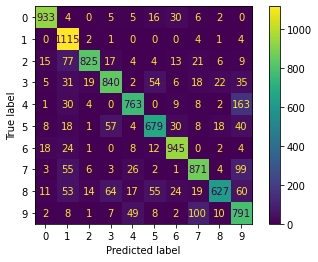

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot()

In [ ]:
pd = [6, 7, 1, 5, 9, 3, 1, 9, 3, 7]
ans = []
for i in np.arange(10):
  sum = cm[i].sum()
  ans.append(cm[i][pd[i]]/sum * 100)
ans

[2.997002997002997,
 0.354924578527063,
 7.769929364278506,
 5.232558139534884,
 16.632653061224488,
 6.60486674391657,
 2.366863905325444,
 9.25233644859813,
 6.779661016949152,
 10.224948875255624]

In [ ]:
y_pred_KNN = classify_KNN(x_train[train_indices['xs']], y_train[train_indices['xs']], x_val, K = 2)
print("50 samples, val error : ", np.mean(y_pred_KNN != y_val))

y_pred_KNN = classify_KNN(x_train[train_indices['s']], y_train[train_indices['s']], x_val, K = 2)
print("500 samples, val error : ", np.mean(y_pred_KNN != y_val))

y_pred_KNN = classify_KNN(x_train[train_indices['m']], y_train[train_indices['m']], x_val, K = 2)
print("5000 samples, val error : ", np.mean(y_pred_KNN != y_val))

y_pred_KNN = classify_KNN(x_train[train_indices['all']], y_train[train_indices['all']], x_val, K = 2)
print("50000 samples, val error : ", np.mean(y_pred_KNN != y_val))

50 samples, val error :  0.3372
500 samples, val error :  0.1611
5000 samples, val error :  0.0682
50000 samples, val error :  0.0304
time: 40min 3s (started: 2023-02-11 10:33:11 +00:00)


In [8]:
def train_NB_mnist(X, y, alpha=1.5):
  '''
  Train P(x_f=v|y=c) for each feature f, value v, and class c.  Can assume 10 classes and that the features are binary variables 
  Input: X[i] is the ith training data. y[i] is the ith training label. alpha is the count prior
  Output: return pxy of shape (Nf, 10, 2), where Nf is the number of features; pxy[f,c,v] is P(x_f=v|y=c) 
  '''
  # needs code here
  theta_ki = np.zeros((len(X[0]), 10, 2))
  pxy = np.zeros((len(X[0]), 10, 2))
  for k in range(10):
    for i in range(len(X[0])):
      theta_ki[i,k,1] = (np.sum((X[:,i] > 0.5) & (y==k))+alpha) / (np.sum(y==k) + alpha * (np.sum(X[:,i] > 0.5)))
      pxy[i,k,1] = theta_ki[i,k,1]
      pxy[i,k,0] = 1 - theta_ki[i,k,1]
  return pxy

# This is a suggested function definition for evauating Naive Bayes, but feel free to change it
def eval_NB_mnist(pxy, y, X):
  '''
  Evaluate naive bayes for mnist
  Input: pxy is the trained model; X is the test data
  Output: return y_pred, where y_pred[i] is the predicted ith test label  
  '''
  y_pred = []
  y_prob = []

  for k in range(10):
    y_prob.append(np.sum(y == k)/ len(y))

  for x in X:
    max_label = 0
    ma = 0
    for k in range(10):
      prob = 1
      ans = 0
      for i in range(len(x)):
        if(x[i] > 0.5):
          prob *= pxy[i, k, 1]
          ans = prob
        else :
          prob *= pxy[i, k, 0]
          ans = prob
      if(ans > ma):
        ma = ans
        max_label = k
    y_pred.append(max_label)
  return y_pred

In [ ]:
pxy = train_NB_mnist(x_train[train_indices['s']], y_train[train_indices['s']])
y_pred = eval_NB_mnist(pxy, y_train, x_val[:10])
y_pred

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]

time: 355 ms (started: 2023-02-11 23:58:45 +00:00)


In [9]:
pxy = train_NB_mnist(x_train[train_indices['s']], y_train[train_indices['s']], 1.5)

In [12]:
pxy = train_NB_mnist(x_train[train_indices['s']], y_train[train_indices['s']], 1.0)
y_pred = eval_NB_mnist(pxy, y_train, x_test)
print("Error rate : ", np.mean(y_pred != y_test))

Error rate :  0.282


In [ ]:
pxy = train_NB_mnist(x_train[train_indices['xs']], y_train[train_indices['xs']], 1.0)
y_pred = eval_NB_mnist(pxy, y_train, x_val)
print("50 samples, val error :" , np.mean(y_pred != y_val))

pxy = train_NB_mnist(x_train[train_indices['s']], y_train[train_indices['s']], 1.0)
y_pred = eval_NB_mnist(pxy, y_train, x_val)
print("500 samples, val error :" , np.mean(y_pred != y_val))

pxy = train_NB_mnist(x_train[train_indices['m']], y_train[train_indices['m']], 1.0)
y_pred = eval_NB_mnist(pxy, y_train, x_val)
print("5000 samples, val error :" , np.mean(y_pred != y_val))

pxy = train_NB_mnist(x_train[train_indices['all']], y_train[train_indices['all']], 1.0)
y_pred = eval_NB_mnist(pxy, y_train, x_val)
print("50000 samples, val error :" , np.mean(y_pred != y_val))

50 samples, val error : 0.6073
500 samples, val error : 0.2851
5000 samples, val error : 0.2496
50000 samples, val error : 0.2421
time: 2min 56s (started: 2023-02-12 01:52:49 +00:00)


In [ ]:
y_pred = eval_NB_mnist(pxy, y_train, x_val[:1])

time: 17.6 ms (started: 2023-02-12 01:26:00 +00:00)


In [4]:
# don't forget logistic regression!
best_c = 1.0
best_score = 0
curr_c = 1.0

while(curr_c <= 10.0):
    lr = LogisticRegression(max_iter=500, C = curr_c)
    lr.fit(x_train[train_indices['s']], y_train[train_indices['s']])
    scr = lr.score(x_train[train_indices['s']], y_train[train_indices['s']])
    if(scr > best_score):
        best_score = scr
        best_c = curr_c
    curr_c += 0.1
score = lr.score(x_val, y_val)

lr = LogisticRegression(max_iter = 500, C = best_c)
lr.fit(x_train[train_indices['s']], y_train[train_indices['s']])
print("Error: ", np.mean(y_val != lr.predict(x_val)))
print("best_c : ", best_c)



Error:  0.154
best_c :  1.0


In [5]:
y_pred_logi = lr.predict(x_test)
print("Error: ", np.mean(y_test != y_pred_logi))

Error:  0.1494


In [6]:
lr = LogisticRegression(max_iter = 500, C = best_c)
lr.fit(x_train[train_indices['xs']], y_train[train_indices['xs']])
print("50 samples, val error :" , np.mean(lr.predict(x_val) != y_val))

lr.fit(x_train[train_indices['s']], y_train[train_indices['s']])
print("500 samples, val error :" , np.mean(lr.predict(x_val) != y_val))

lr.fit(x_train[train_indices['m']], y_train[train_indices['m']])
print("5000 samples, val error :" , np.mean(lr.predict(x_val) != y_val))

lr.fit(x_train[train_indices['all']], y_train[train_indices['all']])
print("50000 samples, val error :" , np.mean(lr.predict(x_val) != y_val))

50 samples, val error : 0.3503
500 samples, val error : 0.154
5000 samples, val error : 0.1095
50000 samples, val error : 0.0752


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


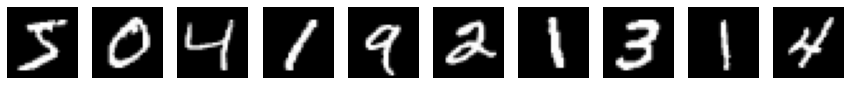

(784,)


In [ ]:
display_mnist(x_val[:10],1,10)
print(np.shape(x_train))

In [ ]:
# experiments code
y = label_for_x(x_test[4], x_train, y_train, 1)
print(y)


4


## Part 2: Temperature Regression

Include all your code for part 2 in this section.  You can copy-paste code from part 1 if it is re-usable.

In [ ]:
import numpy as np
from google.colab import drive
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# load data (modify to match your data directory or comment)
def load_temp_data():
  drive.mount('/content/drive')
  datadir = "/content/drive/MyDrive/" 
  T = np.load(datadir + 'temperature_data.npz')
  x_train, y_train, x_val, y_val, x_test, y_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day = \
  T['x_train'], T['y_train'], T['x_val'], T['y_val'], T['x_test'], T['y_test'], T['dates_train'], T['dates_val'], T['dates_test'], T['feature_to_city'], T['feature_to_day']
  return (x_train, y_train, x_val, y_val, x_test, y_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day)

# plot one data point for listed cities and target temperature
def plot_temps(x, y, cities, feature_to_city, feature_to_day, target_date):
  nc = len(cities)
  ndays = 5
  xplot = np.array([-5,-4,-3,-2,-1])
  yplot = np.zeros((nc,ndays))
  for f in np.arange(len(x)):
    for c in np.arange(nc):
      if cities[c]==feature_to_city[f]:
        yplot[feature_to_day[f]+ndays,c] = x[f]
  plt.plot(xplot,yplot)
  plt.legend(cities)
  plt.plot(0, y, 'b*', markersize=10)
  plt.title('Predict Temp for Cleveland on ' + target_date)
  plt.xlabel('Day')
  plt.ylabel('Avg Temp (C)')
  plt.show()

Mounted at /content/drive
Feature 361: city = Cleveland, day= -1
Baseline - predict same as previous day: RMSE=3.460601246750482, MAE=1.9500000000000006


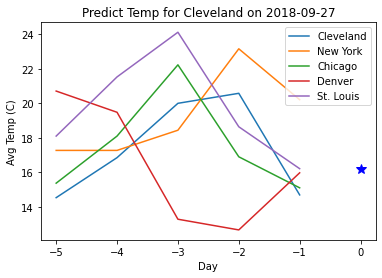

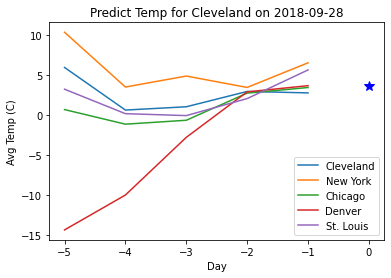

In [ ]:
# load data (may need to modify file location in preceding cell)
(x_train, y_train, x_val, y_val, x_test, y_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day) = load_temp_data()

# example of displaying information related to a feature index
f = 361
print('Feature {}: city = {}, day= {}'.format(f,feature_to_city[f], feature_to_day[f]))

# example of computing RMSE and median absolute error (for baseline of predicting based on previous day's temperature in Cleveland)
baseline_rmse = np.sqrt(np.mean((y_val[1:]-y_val[:-1])**2)) # root mean squared error
baseline_mae = np.median(np.abs(y_val[1:]-y_val[:-1])) # median absolute error
print('Baseline - predict same as previous day: RMSE={}, MAE={}'.format(baseline_rmse, baseline_mae))

# plots temperatures for preceding days for given cities, and target (Cleveland) temp
plot_temps(x_val[0], y_val[0], ['Cleveland', 'New York', 'Chicago', 'Denver', 'St. Louis'], feature_to_city, feature_to_day, dates_val[0])
plot_temps(x_val[100], y_val[100], ['Cleveland', 'New York', 'Chicago', 'Denver', 'St. Louis'], feature_to_city, feature_to_day, dates_val[1])

In [ ]:
def classify_KNN(X_trn, y_trn, X_tst, K=3):
  '''
  Classify each data point in X_tst using a K-nearest neighbor classifier based on (X_trn, y_trn), with L2 distance.   
  Input: X_trn[i] is the ith training data. y_trn[i] is the ith training label. K is the number of closest neighbors to use.
  Output: return y_pred, where y_pred[i] is the predicted ith test label 
  '''
  lab = []
  for x in X_tst:
    dist = []
    for j in range(len(X_trn)):
      dis = np.sqrt(np.sum(np.square(x - X_trn[j])))
      dist.append([j, dis])
    dist.sort(key=lambda tup : tup[1])
    sum = 0
    for i in range(K):
      sum += y_trn[dist[i][0]]
    sum = sum / K
    lab.append(sum)
  return lab

def eval_KNN(X_trn, y_trn, X_tst, y_tst, K=3):
  y_pred = classify_KNN(X_trn, y_trn, X_tst, K=3)
  MSE = np.square(np.subtract(y_tst,y_pred)).mean() 
  print("RMSE : ", np.sqrt(MSE))
  mad = np.median(abs(y_tst - y_pred))
  print("Median abs error : ", mad)

In [ ]:
eval_KNN(x_train, y_train, x_test, y_test, 3)

RMSE :  3.4030752186343767
Median abs error :  2.2566666666666677


In [ ]:
np.shape(x_train[:,1])

(1825,)

In [ ]:
# Suggested function definition for NB for temperature regression, but feel free to change 
def train_NB_temp(X, y, f, std_prior=0):
  '''
  Train NB, assuming that X[f]-y is a Gaussian
  Input: X[i] is the ith training data. y[i] is the ith training label. std_prior is a value to add to std
  Output: return pxy['mu'] and pxy['std'] each with number of values equal to number of features
  '''
  # needs code
  std = np.zeros(f)
  mu = np.zeros(f)
  
  for i in range(f):
    std[i] = np.std(y-X[:,i], axis=0)+np.sqrt(std_prior/len(X))
    mu[i] = np.mean(y-X[:,i], axis=0)
  pxy = {}
  pxy['mu'] = mu
  pxy['std'] = std
  return pxy

def eval_NB_temp(pxy, X, f):
  '''
  Evaluate naive bayes for temp
  Input: pxy is the trained model; X is the test data
  Output: return y_pred, where y_pred[i] is the predicted ith test value
  '''
  # needs code
  pred_y = []
  for x in X:
    sum = 0
    dem = 0
    for i in range(f): 
      sum += (x[i] + pxy['mu'][i])*(pxy['std'][i]**2)
      dem += 1/(pxy['std'][i]**2)
    pred_y.append(sum/dem)
  return pred_y

In [ ]:
pxy = train_NB_temp(x_train, y_train, len(feature_to_city), 0)
y_pred = eval_NB_temp(pxy, x_test, len(feature_to_city))
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
print("RMSE : ", np.sqrt(MSE))
mad = np.median(abs(y_test - y_pred))
print("Median abs error : ", mad)

RMSE :  17955.633894866507
Median abs error :  14851.644000852983


In [ ]:
# Don't forget linear regression!
def classify_LR(X_trn, y_trn, X_tst):
  lr = Ridge()
  lr.fit(X_trn, y_trn)
  return lr.predict(X_tst)

def eval_LR(X_trn, y_trn, X_tst, y_tst):
  y_pred = classify_LR(X_trn, y_trn, X_tst)
  MSE = np.square(np.subtract(y_tst,y_pred)).mean() 
  print("RMSE : ", np.sqrt(MSE))
  mad = np.median(abs(y_tst - y_pred))
  print("Median abs error : ", mad)


In [ ]:
eval_LR(x_train, y_train, x_test, y_test)

RMSE :  2.1608605260826796
Median abs error :  1.3975601000671434


In [ ]:
# Feature analysis
lf = Lasso()
lf.fit(x_train, y_train)
org = lf.coef_
arr = lf.coef_

ind = np.argsort(arr)[::-1][:10]
print(ind)

cities = []
dates = []
for i in ind :
  cities.append(feature_to_city[i])
  dates.append(feature_to_day[i])

print(cities)
print(dates)

[334 347 405 366 361 367   9 236 290 175]
['Chicago', 'Minneapolis', 'Grand Rapids', 'Kansas City', 'Cleveland', 'Indianapolis', 'Boston', 'Springfield', 'Providence', 'Boston']
[-1, -1, -1, -1, -1, -1, -5, -3, -2, -3]


In [ ]:
#KNN using top 10 features
import math
def classify_KNN_10(X_trn, y_trn, X_tst, K=3):
  lab = []
  for x in X_tst:
    dist = []
    for j in range(len(X_trn)):
      sum = 0
      for feat in ind:
        sum += (X_trn[j][feat] - x[feat])**2
      sum = math.sqrt(sum)
      dist.append([j, sum])
    dist.sort(key=lambda tup : tup[1])
    sum = 0
    for i in range(K):
      sum += y_trn[dist[i][0]]
    sum = sum / K
    lab.append(sum)
  return lab

def eval_KNN(X_trn, y_trn, X_tst, y_tst, K=3):
  y_pred = classify_KNN(X_trn, y_trn, X_tst, K=3)
  MSE = np.square(np.subtract(y_tst,y_pred)).mean() 
  print("RMSE : ", np.sqrt(MSE))
  mad = np.median(abs(y_tst - y_pred))
  print("Median abs error : ", mad)

In [ ]:
eval_KNN(x_train, y_train, x_test, y_test, 3)

RMSE :  3.4030752186343767
Median abs error :  2.2566666666666677


In [ ]:
#Linear Regression with top 10 features

x_train10 = []
x_test10 = []


for (j, x) in enumerate(x_train):
  arrx = np.zeros(10)
  for (i, feat) in enumerate(ind):
    arrx[i] = (x_train[j][feat])
  x_train10.append(arrx)

for (j, x) in enumerate(x_test):
  arrx = np.zeros(10)
  for (i, feat) in enumerate(ind):
    arrx[i] = (x_test[j][feat])
  x_test10.append(arrx)

eval_LR(x_train10, y_train, x_test10, y_test)

RMSE :  2.370990013806742
Median abs error :  1.3330625523169675


In [ ]:
#Naive Bayes with top 10 features
x_train10 = []
x_test10 = []

for (j, x) in enumerate(x_train):
  arrx = np.zeros(10)
  for (i, feat) in enumerate(ind):
    arrx[i] = (x_train[j][feat])
  x_train10.append(arrx)

for (j, x) in enumerate(x_test):
  arrx = np.zeros(10)
  for (i, feat) in enumerate(ind):
    arrx[i] = (x_test[j][feat])
  x_test10.append(arrx)

x_train10 = np.array(x_train10)
x_test10 = np.array(x_test10)


pxy = train_NB_temp(x_train10, y_train, int(10), 0)
y_pred = eval_NB_temp(pxy, x_test10, int(10))
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
print("RMSE : ", np.sqrt(MSE))
mad = np.median(abs(y_test - y_pred))
print("Median abs error : ", mad)

RMSE :  5037.642278288449
Median abs error :  3304.685047162338


## Part 3: Stretch Goals
Include all your code used for part 3 in this section. You can copy-paste code from parts 1 or 2 if it is re-usable.

In [ ]:
#MNIST DATASET KNN
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

# This is a suggested function definition for KNN, but feel free to change it
def classify_KNN(X_trn, y_trn, X_tst, y_tst, K=1):
  '''
  Classify each data point in X_tst using a K-nearest neighbor classifier based on (X_trn, y_trn), with L2 distance.   
  Input: X_trn[i] is the ith training data. y_trn[i] is the ith training label. 
         X_tst[i] is the ith example to classify.  K is the number of closest neighbors to use.
  Output: return y_pred, where y_pred[i] is the predicted ith test label 
  '''
  knn = KNeighborsClassifier( metric="euclidean", n_neighbors=1)
  knn.fit(X_trn, y_trn)
  y_pred = knn.predict(X_tst)
  print(accuracy_score(y_tst, y_pred))

def plot_error(acc) :
  plt.figure(figsize = (12, 6))
  plt.plot(range(1, 15), acc , marker = "o", linestyle = "dashed", color = "blue")
  plt.title("Accuracy vs k value")
  plt.xticks(range(1, 15))
  plt.show()

In [ ]:
p = classify_KNN(x_train[train_indices['all']], y_train[train_indices['all']], x_val, y_val)

0.9632


In [ ]:
p = classify_KNN(x_train[train_indices['all']], y_train[train_indices['all']], x_val, y_val)

0.9696


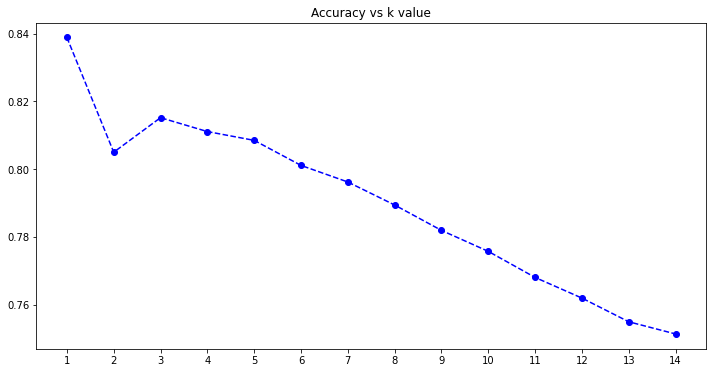

In [ ]:
plot_error(p)
#Best k value is 1

In [ ]:
p = classify_KNN(x_train[train_indices['all']], y_train[train_indices['all']], x_test, y_test, K=2)

0.9669


In [ ]:
1 - 0.9669

0.03310000000000002

In [ ]:
#Temperature prediction using Linear regression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

def classify_KNN(X_trn, y_trn, X_tst, K=3):
  '''
  Classify each data point in X_tst using a K-nearest neighbor classifier based on (X_trn, y_trn), with L2 distance.   
  Input: X_trn[i] is the ith training data. y_trn[i] is the ith training label. K is the number of closest neighbors to use.
  Output: return y_pred, where y_pred[i] is the predicted ith test label 
  '''
  scaler = StandardScaler()
  X_trn = scaler.fit_transform(X_trn)
  X_tst = scaler.transform(X_tst)
  lab = []
  for x in X_tst:
    dist = []
    for j in range(len(X_trn)):
      dis = np.sum(np.sum(np.square(x - X_trn[j])))
      dist.append([j, dis])
    dist.sort(key=lambda tup : tup[1])
    sum = 0
    for i in range(K):
      sum += y_trn[dist[i][0]]
    sum = sum / K
    lab.append(sum)
  return lab

def eval_KNN(X_trn, y_trn, X_tst, y_tst, K=3):
  y_pred = classify_KNN(X_trn, y_trn, X_tst, K)
  MSE = np.square(np.subtract(y_tst,y_pred)).mean() 
  print("RMSE : ", np.sqrt(MSE))
  mad = np.median(abs(y_tst - y_pred))
  print("Median abs error : ", mad)

In [ ]:
from sklearn import decomposition, datasets
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error

def classify_LR(X_trn, y_trn, X_tst, y_tst):
  X_trn = preprocessing.scale(X_trn)
  X_tst = preprocessing.scale(X_tst)
  best_mse = 10000000
  best_alpha = 0
  for alpha in np.arange(0, 200, 1):
    lr = Ridge(alpha=alpha)
    lr.fit(X_trn, y_trn)
    y_pred = lr.predict(X_tst)
    mse = np.square(np.subtract(y_tst,y_pred)).mean()
    if(mean_squared_error(y_tst, y_pred) < best_mse) :
      best_mse = mean_squared_error(y_tst, y_pred)
      best_alpha = alpha
  print(best_mse, " ", best_alpha)


def eval_LR(X_trn, y_trn, X_tst, y_tst):
  y_pred = classify_LR(X_trn, y_trn, X_tst, y_tst)
  MSE = np.square(np.subtract(y_tst,y_pred)).mean() 
  print("RMSE : ", np.sqrt(MSE))
  mad = np.median(abs(y_tst - y_pred))
  print("Median abs error : ", mad)


In [ ]:
classify_LR(x_train, y_train, x_val, y_val)

2.1664065523006677   34


In [ ]:
classify_LR(x_train, y_train, x_test, y_test)

2.3473986008072876   30
